## Микишева Мария Б03-212 Задание Т5

In [70]:
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy as sp
import random as rd
import numpy as np

In [85]:
N = 100
THETA = 3
BETA = 0.95

# Генерация выборки

In [86]:
def generate_pareto_sample(theta, size):

    return st.pareto.rvs(b=(theta-1), size=size)

In [87]:
sample = generate_pareto_sample(THETA, N)
print('sample =', sample)

sample = [ 1.10725378  1.13383341  4.08164212  2.54414729  2.21536608  1.15651919
  2.38923844  1.1001367   1.15941695  1.01133849  1.33476505  1.20030521
  1.21852903  2.215211    1.9063681   4.6076318   1.0379837   1.06956704
  2.22596389  1.02536962  1.03773751  1.45748824  1.16219687  2.30259133
  1.11983922  1.10550093  1.54255337  1.22181012  2.32037517  1.77174312
  1.0582987   1.55154213  1.02384341  1.51870894  1.47090559  1.67595941
  1.91738815  2.60550481  2.4698649   1.11548039  1.93888147  1.06060981
  5.45014265  1.27592575  1.04766646  1.12517685  2.93881617  1.33850334
  2.21953205  1.24081882  1.10633358  1.68585817  1.30218399  1.07580891
  3.34846061  1.65113608  2.15268028  1.04337557  1.47333037  4.24917209
  1.04538071  1.26564633  1.63037588  1.15117033  1.45132943  4.4157167
  1.40975829  1.7380473   1.03849731  2.22793745  1.09516726  1.17001245
  2.31069399  1.31948018  1.20101476  1.70842994  1.20788893  1.43479938
  2.82188273  2.65801847  1.05794962  1.304

## Оценка параметра распределения

In [88]:
def calc_theta(sample):
  return np.size(sample) / np.sum(np.log(sample)) + 1

## Асимптотический доверительный интервал медианы

In [89]:
def quantiles(beta):
    u1 = 2**0.5 * sp.special.erfinv(-beta)
    u2 = -u1
    return u1, u2

def asymptotic_confidence_interval_median(sample, beta):
    n = np.size(sample)
    theta = calc_theta(sample)
    u1, u2 = quantiles(beta)
    t1 = (u1 * 2**(1/(theta-1)) * np.log(2)) / ((theta-1) * n**0.5) + 2**(1/(theta-1))
    t2 = (u2 * 2**(1/(theta-1)) * np.log(2)) / ((theta-1) * n**0.5) + 2**(1/(theta-1))
    return t1, t2

t1, t2 = asymptotic_confidence_interval_median(sample, BETA)

In [90]:
print(f'Доверительный интервал: {round(t1, 3)} < theta < {round(t2, 3)}')
print(f'Длина точного доверительного интервала: {t2-t1}')

Доверительный интервал: 1.3 < theta < 1.48
Длина точного доверительного интервала: 0.17948806750034274


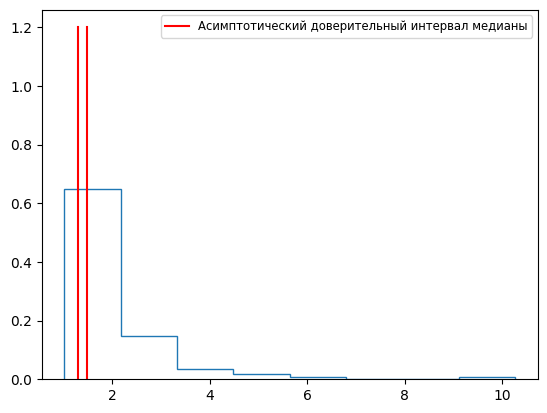

In [91]:
k = 1 + int(round(np.log2(len(sample))))
plt.hist(sample, density=True, bins=k, histtype="step")
plt.plot([t1, t1], [0, 1.2], color="red", label='Асимптотический доверительный интервал медианы')
plt.plot([t2, t2], [0, 1.2], color="red")
plt.legend(loc=1, fontsize='small', fancybox=True);

## Асимптотический доверительный интервал (ОМП)

In [99]:
def asymptotic_confidence_interval(sample, beta):
    n = np.size(sample)
    theta = calc_theta(sample)
    u1, u2 = quantiles(beta)

    t1 = u1 * (theta-1)/n**0.5 + theta
    t2 = u2 * (theta-1)/n**0.5 + theta
    return t1, t2

t1, t2 = asymptotic_confidence_interval(sample, BETA)

In [100]:
print(f'Асимптотический довертельный интервал: {round(t1, 3)} < theta < {round(t2, 3)}')
print(f'Длина асимптотического доверительного интервала: {t2-t1}')

Асимптотический довертельный интервал: 2.692 < theta < 3.517
Длина асимптотического доверительного интервала: 0.8248918827598146


## Бутстраповский непараметрический доверительный интервал

In [94]:
def bootstrap_confidence_interval(sample, beta):
    theta = calc_theta(sample)
    deltas = []
    for i in range(1000):
        sample_i = np.random.choice(sample, size=np.size(sample))
        deltas.append(calc_theta(sample_i) - theta)
    deltas = np.sort(deltas)
    k1 = int((1+beta)/2 * 1000)
    k2 = int((1-beta)/2 * 1000)
    t1 = theta - deltas[k1]
    t2 = theta - deltas[k2]
    return t1, t2

t1, t2 = bootstrap_confidence_interval(sample, BETA)

In [95]:
print(f'Бутстраповский доверительный интервал {round(t1, 3)} < theta < {round(t2, 3)}')
print(f'Длина бутстраповского доверительного интервала: {t2-t1}')

Бутстраповский доверительный интервал 2.636 < theta < 3.464
Длина бутстраповского доверительного интервала: 0.8276512737834789


## Бутстраповский параметрический доверительный интервал

In [96]:
def bootstrap_param_confidence_interval(sample, beta):
    theta = calc_theta(sample)
    thetas = []
    for i in range(1000):
        sample_i = np.random.choice(sample, size=np.size(sample))
        thetas.append(calc_theta(sample_i))
    k1 = int((1-beta)/2 * 1000)
    k2 = int((1+beta)/2 * 1000)
    thetas = np.sort(thetas)
    t1 = thetas[k1]
    t2 = thetas[k2]
    return t1, t2

t1, t2 = bootstrap_param_confidence_interval(sample, BETA)

In [97]:
print(f'Бутстраповский параметрический доверительный интервал {round(t1, 3)} < theta < {round(t2, 3)}')
print(f'Длина бутстраповского параметрического доверительного интервала: {t2-t1}')

Бутстраповский параметрический доверительный интервал 2.75 < theta < 3.557
Длина бутстраповского параметрического доверительного интервала: 0.807085897527652


## Сранение

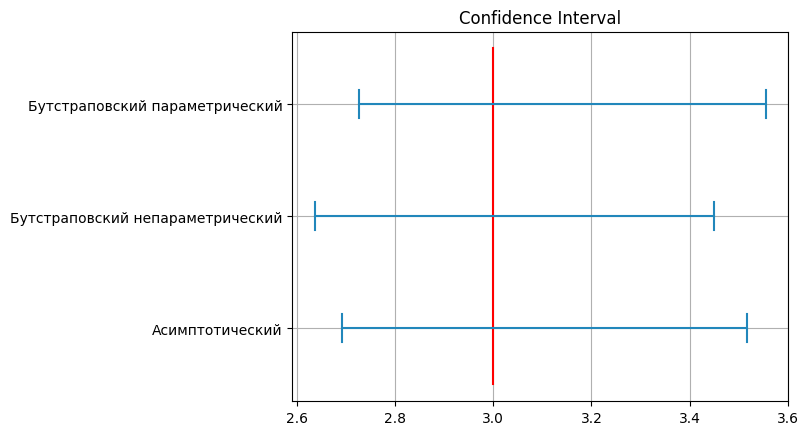

In [98]:
import matplotlib.pyplot as plt

def plot_confidence_interval(num, sample, beta, eval_func, color='#2187bb', vertical_line_width=0.25):
    t1, t2 = eval_func(sample, beta)
    plt.plot([t1, t2], [num, num], color=color)
    plt.plot([t1, t1], [num-vertical_line_width/2, num+vertical_line_width/2], color=color)
    plt.plot([t2, t2], [num-vertical_line_width/2, num+vertical_line_width/2], color=color)
    return

plt.yticks([1, 2, 3], ['Асимптотический', 'Бутстраповский непараметрический', 'Бутстраповский параметрический'])
plt.title('Confidence Interval')
plt.plot([THETA, THETA], [0.5, 3.5], color='red')
plot_confidence_interval(1, sample, BETA, asymptotic_confidence_interval)
plot_confidence_interval(2, sample, BETA, bootstrap_confidence_interval)
plot_confidence_interval(3, sample, BETA, bootstrap_param_confidence_interval)
plt.grid()
plt.show()